In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_skimmed'

In [3]:
# Signal
f_sig = "example_signal_v2"
sig_histo = util.load(f'{prefix}/{f_sig}{suffix}.coffea')[0]

In [4]:
# Background
bkg_files = {
    "QCD": "example_bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "example_bkg_2018_Top",
    "DY": "example_bkg_2018_DY",
    "Diboson": "example_bkg_2018_Diboson",
    "Triboson": "example_bkg_2018_Triboson",
    "W+jets": "example_bkg_2018_WJets",
    "Z+jets": "example_bkg_2018_ZJets",
}

bkg_histos = {}
histograms = []

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]
    histograms = list(bkg_histos[b].keys())

In [5]:
# sig_histo is a dictionary of variables
print(sig_histo.keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'num_electrons', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_m

In [6]:
# bkg_histos is a dictionary of dictionary
print(bkg_histos.keys())

dict_keys(['QCD', 'Top', 'DY', 'Diboson', 'Triboson', 'W+jets', 'Z+jets'])


In [7]:
process = 'W+jets'
print(bkg_histos[process].keys())

dict_keys(['sel_vtx_type', 'sel_vtx_sign', 'sel_vtx_dR', 'sel_vtx_dR_over_pT', 'sel_vtx_dR_over_m', 'sel_vtx_dR_over_pTm', 'sel_vtx_dR_over_mpT', 'sel_vtx_chi2', 'sel_vtx_prob', 'sel_vtx_vxy', 'sel_vtx_vxy_zoom', 'sel_vtx_vxy_zoomzoom', 'sel_vtx_vxySignif', 'sel_vtx_mass', 'sel_vtx_minDxy', 'sel_vtx_minDxy_fine', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_matchType', 'sel_vtx_max_chi2', 'sel_vtx_min_pt', 'sel_vtx_maxPFIso', 'sel_vtx_minEledRj', 'sel_vtx_minEledPhiJ', 'sel_vtx_METdPhi_vs_matchType', 'sel_vtx_minEledRj_vs_matchType', 'sel_vtx_minEledPhiJ_vs_matchType', 'sel_vtx_mindRj', 'sel_vtx_mindPhiJ', 'sel_vtx_mindRj_vs_matchType', 'sel_vtx_mindPhiJ_vs_matchType', 'num_electrons', 'sel_vtx_mass_vs_mindxy', 'sel_vtx_mass_vs_vxy', 'sel_vtx_METdPhi_vs_chi2', 'sel_vtx_METdPhi_vs_mindxy', 'sel_vtx_METdPhi_vs_vxy', 'sel_vtx_METdPhi_vs_mindPhiJ', 'sel_vtx_METdPhi_vs_mindRj', 'sel_vtx_METdPhi_vs_minEledPhiJ', 'sel_vtx_METdPhi_vs_minEledRj', 'sel_vtx_maxPFIso_vs_mindxy', 'sel_vtx_m

## Signal

### Access the cutflow information

In [8]:
sig_samples = list(sig_histo['cutflow'].keys()) # names of signal sub-process, i.e. mass point, lifetime etc.
print(sig_samples)

['sig_2018_Mchi-5p25_dMchi-0p5_ctau-10', 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-100', 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-1', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10', 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1', 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100', 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100', 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-10', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-100', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1', 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1', 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100', 'sig_2018_Mchi-11p0_dMchi-2p0_ctau

In [9]:
cuts = list(sig_histo['cutflow'][sig_samples[0]].keys())
print(cuts)

['all', 'hasVtx', 'vtxGenMatch', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11', 'cut12']


**Based on the signal file name, i.e. sig_2018_Mchi-55p0_dMchi-10p0_ctau-100, extract the mass point, lifetime, etc and make it into a pandas dataframe**: use `signalPoint` defined in `/python_analysis/analysisTools/plotTools.py`

In [10]:
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

print(si)

                                         mchi  dmchi   ctau    m1    m2  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10     5.25    0.5   10.0   5.0   5.5   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100    5.25    0.5  100.0   5.0   5.5   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      5.25    0.5    1.0   5.0   5.5   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100  55.00   10.0  100.0  50.0  60.0   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10   55.00   10.0   10.0  50.0  60.0   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    55.00   10.0    1.0  50.0  60.0   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10    52.50    5.0   10.0  50.0  55.0   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     52.50    5.0    1.0  50.0  55.0   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100   52.50    5.0  100.0  50.0  55.0   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100   44.00    8.0  100.0  40.0  48.0   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10    44.00    8.0   10.0  40.0  48.0   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100   42.00    4.0  100.0  40.0  44.0   
sig_2018_Mchi-42p0_dMchi-

**There are four cutflow-related variables in the coffea output.**

- `cutDesc`: cut names
- `cutflow`: efficiency = selected events / total events `cutflow[cutName] += np.sum(events.genWgt)/sum_wgt`
- `cutflow_cts`: reweighted by xsec `cutflow_counts[cutName] = xsec*lumi*cutflow[cutName]`
- `cutflow_nevts`: raw counts `cutflow_nevts[cutName] += len(events)` -- will not be used.

In [11]:
# cutDesc
print(sig_histo['cutDesc'])

print(f"\nex) cut8 corresponds to {sig_histo['cutDesc']['cut8']}")

defaultdict(<class 'str'>, {'all': 'No cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cutsNo cuts', 'hasVtx': 'Baseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline SelectionBaseline Selection', 'vtxGenMatch': 'Vertex electrons gen-matchingVertex electrons gen-matchingVertex electrons gen-matchingVertex electrons gen-matchingVertex electron

**Access the cut names stored in cutDesc via getCut defined in `/python_analysis/analysisTools/plotTools.py`.** 
The function removes the redundant junk in `all` and `hasVtx` steps.

In [12]:
sig_histo['cutDesc'].keys()

dict_keys(['all', 'hasVtx', 'vtxGenMatch', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11', 'cut12'])

In [13]:
# cutflow
cutNames = {cname:ptools.getCut(sig_histo['cutDesc'][cname]) for cname in sig_histo['cutDesc'].keys()}
print(cutNames)

{'all': 'No cuts', 'hasVtx': 'Baseline Selection', 'vtxGenMatch': 'Vertex electrons gen-matching', 'cut5': 'No b-tagged jets', 'cut6': 'Leading jet |eta| < 2.4', 'cut7': 'Leading jet pT > 80 GeV', 'cut8': 'dPhi(MET,leading jet) > 1.5', 'cut9': 'dPhi(MET,all jets) > 0.75', 'cut10': 'OSSF', 'cut11': 'Vertex chi2/df < 5', 'cut12': 'dPhi(MET,vtx) < 2.5'}


In [14]:
# signal efficiencies by delta/ctau
cf_s = sig_histo['cutflow']
ct_s = sig_histo['cutflow_cts']
desc = sig_histo['cutDesc']

In [15]:
process = 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100'

print(process)

print(f'\nEfficiency = selected events / total events analyzed from ntuples: {cf_s[process]}')
print(f'\nEvents (xsec weighted): {ct_s[process]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency = selected events / total events analyzed from ntuples: defaultdict(<class 'float'>, {'all': 0.02245207104068285, 'hasVtx': 0.003938979955092464, 'vtxGenMatch': 0.0007301604778907318, 'cut5': 0.0006479977996033543, 'cut6': 0.0006315490752939489, 'cut7': 0.0006315490752939489, 'cut8': 0.0003091697362913929, 'cut9': 0.00029602554163613893, 'cut10': 0.00028286448380179135, 'cut11': 0.0002597736905110076, 'cut12': 0.0002597736905110076})

Events (xsec weighted): defaultdict(<class 'float'>, {'all': 1.3682651217334318, 'hasVtx': 0.24004773893661355, 'vtxGenMatch': 0.04449714742821863, 'cut5': 0.03949002239262084, 'cut6': 0.038487610823158616, 'cut7': 0.038487610823158616, 'cut8': 0.018841298252464906, 'cut9': 0.01804027000578464, 'cut10': 0.01723821408999743, 'cut11': 0.015831024212694476, 'cut12': 0.015831024212694476})


In [16]:
cut = 'all'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No cuts: 0.02245207104068285


**The efficiency after no cuts applied is less than 1.** 

Note that the efficiency at 'No cuts' step is not 1. This is because the efficiency at this step is the efficiency of the preselections (MET trigger, MET cut etc) applied to the ntuples by the skimmer before we ran the coffea analyzer. In other words, this is 'no cut' from the point of coffea analyzer, but some cuts already have been applied by the skimmer.

In [17]:
cut = 'hasVtx'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Baseline Selection: 0.003938979955092464


**At this step, we required that there is at least one ee vertex in the event where both e satisfy the electron cuts (kinematics and ID).**

`defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event. `vtx` is saved from the ntuplizer in `AODSkimmer/plugins/ElectronSkimmer.cc`, with all possible ee pairs that form a valid vertex in each event. 

1. `AODSkimmer/plugins/ElectronSkimmer.cc` saves `vtx` information to the ntuples, with all possible ee pairs that form a valid vertex in each event.
2. `defineGoodVertices` in `/python_analysis/analysisTools/analysisSubroutines.py` saves `good_vtx` of di-electrons that pass the electron cuts, out of all `vtx` in the event.
3. `hasVtx` step in `/python_analysis/analysisTools/analysisTools.py` requires that there is at least one `good_vtx` in the event.

Later, the analyzer picks the "best" vertex based on their vertex fitting chi2. Select the vertex that has the lowest chi2 in the event and save it as `sel_vtx`.
For signal, this `sel_vtx` based on chi2 selection may or may not match the "true" vertex that is formed by two gen-matched ee - where the two gen-matched ee refers to: reco electron that is closest to gen electron with dR(gen, reco) < 0.1 and reco positron that is closest to gen positron with dR(gen, reco) < 0.1. 

In [18]:
cut = 'vtxGenMatch'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after Vertex electrons gen-matching: 0.0007301604778907318


In [19]:
cut = 'cut5'

print(process)
print(f'\nEfficiency after {cutNames[cut]}: {cf_s[process][cut]}')

sig_2018_Mchi-55p0_dMchi-10p0_ctau-100

Efficiency after No b-tagged jets: 0.0006479977996033543


### Access the cutflow of the signal based on mass point, lifetime, etc

In [20]:
deltas = sorted(list(set(si.delta)))

print(f'deltas: {deltas}')

deltas: [0.1, 0.2]


In [21]:
delta = deltas[0]

m1s = sorted(list(set(si[si.delta==delta].m1)))
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

print(f'For delta = {delta}: m1 = {m1s}, ctaus = {ctaus}')

For delta = 0.1: m1 = [5.0, 10.0, 20.0, 30.0, 40.0, 50.0], ctaus = [1.0, 10.0, 100.0]


In [22]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]
print(f'Signal sample with delta = {delta}, m1 = {m1}, ct = {ct}: {pt}\n')

effs = [cf_s[pt][cut] for cut in cuts]
print(f'Efficiency after each cut: {effs}')

Signal sample with delta = 0.1, m1 = 5.0, ct = 1.0: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1

Efficiency after each cut: [0.014781604273838733, 0.003136192622361011, 0.000942982806383664, 0.0008557378592710096, 0.0008224922437342422, 0.0008224922437342422, 0.00045698527190577104, 0.00043205426019005496, 0.000419604870802511, 0.0003947101561808066, 0.0003947101561808066]


### Display the cutflow of efficiency and number of events as pandas dataframe

In [23]:
columns = list(cf_s.keys())
columns

['sig_2018_Mchi-5p25_dMchi-0p5_ctau-10',
 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-100',
 'sig_2018_Mchi-5p25_dMchi-0p5_ctau-1',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-100',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-10',
 'sig_2018_Mchi-55p0_dMchi-10p0_ctau-1',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-10',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-1',
 'sig_2018_Mchi-52p5_dMchi-5p0_ctau-100',
 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-100',
 'sig_2018_Mchi-44p0_dMchi-8p0_ctau-10',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-100',
 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-1',
 'sig_2018_Mchi-33p0_dMchi-6p0_ctau-10',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-100',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-100',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-1',
 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-1',
 'sig_2018_Mchi-22p0_dMchi-4p0_ctau-10',
 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-100',
 'sig_2018_

In [24]:
efficiency = {c: [ cf_s[samp][c] for samp in columns ] for c in cuts}

efficiency['all']

[0.010658768977725525,
 0.007299810449194413,
 0.014781604273838733,
 0.02245207104068285,
 0.03112463103097606,
 0.03382568049132571,
 0.03255430960821657,
 0.03635145818026507,
 0.022714958823478345,
 0.017678968197697313,
 0.025603431157733853,
 0.017713503325300316,
 0.025678436469731624,
 0.013707585699976632,
 0.030498540269915244,
 0.020103581896133583,
 0.01971139213582639,
 0.010357327849236663,
 0.020151106431223448,
 0.013519837774951745,
 0.01697908106564566,
 0.023188260640675206,
 0.01573670249832017,
 0.01064869936652198,
 0.007819857876963534,
 0.016155116494530466,
 0.00803894876835806,
 0.018942324179020732,
 0.014369238772512016,
 0.012367865984636224,
 0.012434054762227753,
 0.015967512194728226]

In [25]:
eff_df = pd.DataFrame.from_dict(efficiency).transpose()
eff_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

eff_df.index = cut

In [26]:
eff_df

,sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,...,sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,sig_2018_Mchi-10p5_dMchi-1p0_ctau-1
Preselections,0.010659,0.007300,0.014782,0.022452,0.031125,0.033826,0.032554,0.036351,0.022715,0.017679,...,0.015737,0.010649,0.007820,0.016155,0.008039,0.018942,0.014369,0.012368,0.012434,0.015968
0 < n(jet) < 3 & n(good vertex) > 0,0.001788,0.001070,0.003136,0.003939,0.007399,0.009426,0.006933,0.008977,0.003836,0.002966,...,0.002995,0.001609,0.001022,0.003044,0.001162,0.004017,0.003113,0.002165,0.002192,0.003465
Vertex electrons gen-matching,0.000287,0.000053,0.000943,0.000730,0.002838,0.004183,0.002077,0.003345,0.000564,0.000499,...,0.000878,0.000130,0.000076,0.000720,0.000080,0.001352,0.001033,0.000523,0.000497,0.001029
No b-tagged jets,0.000256,0.000045,0.000856,0.000648,0.002484,0.003649,0.001753,0.002942,0.000497,0.000439,...,0.000820,0.000113,0.000060,0.000632,0.000068,0.001134,0.000973,0.000441,0.000427,0.000897
Leading jet |eta| < 2.4,0.000241,0.000042,0.000822,0.000632,0.002363,0.003561,0.001727,0.002858,0.000471,0.000421,...,0.000779,0.000112,0.000060,0.000594,0.000063,0.001097,0.000939,0.000418,0.000412,0.000844
Leading jet pT > 80 GeV,0.000241,0.000042,0.000822,0.000632,0.002363,0.003561,0.001727,0.002858,0.000471,0.000421,...,0.000779,0.000112,0.000060,0.000594,0.000063,0.001094,0.000939,0.000418,0.000412,0.000844
"dPhi(MET,leading jet) > 1.5",0.000113,0.000019,0.000457,0.000309,0.001268,0.001915,0.000844,0.001462,0.000258,0.000211,...,0.000441,0.000065,0.000028,0.000275,0.000028,0.000539,0.000500,0.000215,0.000208,0.000441
"dPhi(MET,all jets) > 0.75",0.000109,0.000019,0.000432,0.000296,0.001216,0.001781,0.000805,0.001394,0.000248,0.000200,...,0.000419,0.000062,0.000028,0.000257,0.000028,0.000524,0.000480,0.000211,0.000204,0.000431
OSSF,0.000101,0.000019,0.000420,0.000283,0.001199,0.001781,0.000805,0.001394,0.000239,0.000193,...,0.000419,0.000060,0.000028,0.000257,0.000028,0.000522,0.000473,0.000211,0.000199,0.000415
Vertex chi2/df < 5,0.000097,0.000018,0.000395,0.000260,0.001095,0.001648,0.000792,0.001361,0.000213,0.000183,...,0.000392,0.000057,0.000028,0.000246,0.000027,0.000506,0.000432,0.000207,0.000185,0.000384


In [27]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

pt = si[(si.delta==delta) & (si.m1==m1) & (si.ctau==ct)].name[0]

eff_df[pt]

Preselections                          0.014782
0 < n(jet) < 3 & n(good vertex) > 0    0.003136
Vertex electrons gen-matching          0.000943
No b-tagged jets                       0.000856
Leading jet |eta| < 2.4                0.000822
Leading jet pT > 80 GeV                0.000822
dPhi(MET,leading jet) > 1.5            0.000457
dPhi(MET,all jets) > 0.75              0.000432
OSSF                                   0.000420
Vertex chi2/df < 5                     0.000395
dPhi(MET,vtx) < 2.5                    0.000395
Name: sig_2018_Mchi-5p25_dMchi-0p5_ctau-1, dtype: float64

#### Cutflow of number of events (xsec weighted counts)

In [28]:
columns_ctau = {'1': {'0p1': [], '0p2': []}, '10': {'0p1': [], '0p2': []}, '100': {'0p1': [], '0p2': []}}

for name in columns:
    mchi = int(name.split('-')[1].split('p')[0])
    dmchi = int(name.split('-')[2].split('p')[0])

    delta = round(dmchi / mchi, 1)

    if 'ctau-10' not in name:
        if delta == 0.1:
            columns_ctau['1']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['1']['0p2'].append(name)
    elif 'ctau-100' not in name:
        if delta == 0.1:
            columns_ctau['10']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['10']['0p2'].append(name)
    else:
        if delta == 0.1:
            columns_ctau['100']['0p1'].append(name)
        elif delta == 0.2:
            columns_ctau['100']['0p2'].append(name)

ct = '10'
delta = '0p1'
print(columns_ctau[ct][delta])

['sig_2018_Mchi-52p5_dMchi-5p0_ctau-10', 'sig_2018_Mchi-42p0_dMchi-4p0_ctau-10', 'sig_2018_Mchi-31p5_dMchi-3p0_ctau-10', 'sig_2018_Mchi-21p0_dMchi-2p0_ctau-10', 'sig_2018_Mchi-10p5_dMchi-1p0_ctau-10']


In [60]:
counts = {}

for ct in columns_ctau.keys():
    counts[ct] = {}
    for delta in ['0p1', '0p2']:
        counts[ct][delta] = {}
        for samp in columns_ctau[ct][delta]:
            counts[ct][delta][samp] = {}
            for c in cuts:
                counts[ct][delta][samp][c] = ct_s[samp][c]

In [61]:
#cts_df = {ct: pd.DataFrame.from_dict(counts[ct]).transpose() for ct in columns_ctau.keys()}

cts_df = {}

for ct in columns_ctau.keys():
    cts_df[ct] = {delta: pd.DataFrame.from_dict(counts[ct][delta]) for delta in ['0p1', '0p2']}
    #cts_df[ct] = {delta: pd.DataFrame.from_dict(counts[ct]).transpose()}
    
    for delta in ['0p1', '0p2']:
        cts_df[ct][delta].columns = [ s.replace('sig_2018_', '') for s in columns_ctau[ct][delta] ]
    
        labels = [cutNames[c] for c in cuts]
        # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
        cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
        cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
        
        cts_df[ct][delta].index = cut

In [62]:
pd.options.display.float_format = '{:,.2f}'.format

ct = '1'
delta = '0p1'
cts_df[ct][delta]

,Mchi-52p5_dMchi-5p0_ctau-1,Mchi-42p0_dMchi-4p0_ctau-1,Mchi-31p5_dMchi-3p0_ctau-1,Mchi-21p0_dMchi-2p0_ctau-1,Mchi-10p5_dMchi-1p0_ctau-1
Preselections,"6,568.33","16,163.02","33,756.75","30,374.50","39,493.42"
0 < n(jet) < 3 & n(good vertex) > 0,"1,622.09","3,805.98","7,361.18","6,441.60","8,569.74"
No b-tagged jets,531.66,"1,173.28","2,058.79","1,818.57","2,217.58"
Leading jet |eta| < 2.4,516.47,"1,116.52","1,984.20","1,758.53","2,087.52"
Leading jet pT > 80 GeV,516.47,"1,114.63","1,984.20","1,755.00","2,087.52"
"dPhi(MET,leading jet) > 1.5",264.13,535.47,998.80,865.08,"1,089.65"
"dPhi(MET,all jets) > 0.75",251.97,526.01,964.92,840.28,"1,065.53"
OSSF,251.97,522.22,961.57,836.76,"1,026.96"
Vertex chi2/df < 5,245.90,478.74,903.97,812.02,949.77
"dPhi(MET,vtx) < 2.5",245.90,478.74,903.97,812.02,949.77


In [32]:
ct = '10'
delta = '0p1'
samp = 'Mchi-52p5_dMchi-5p0_ctau-10'

cts_df[ct][delta][samp]

Preselections                         628.05
0 < n(jet) < 3 & n(good vertex) > 0   133.75
Vertex electrons gen-matching          40.07
No b-tagged jets                       33.81
Leading jet |eta| < 2.4                33.31
Leading jet pT > 80 GeV                33.31
dPhi(MET,leading jet) > 1.5            16.28
dPhi(MET,all jets) > 0.75              15.53
OSSF                                   15.53
Vertex chi2/df < 5                     15.28
dPhi(MET,vtx) < 2.5                    15.28
Name: Mchi-52p5_dMchi-5p0_ctau-10, dtype: float64

### Plot the efficiency

In [33]:
def plot_efficiency_signal(df_sig, dict_eff, cuts, cutNames, m1, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
    effs = [dict_eff[pt][cut] for cut in cuts]

    plt.plot( np.arange(len(cuts)), effs )

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$M_1 = {}$ GeV, $\Delta = {:.1f}$, $c\tau = {}$ mm".format(m1, delta, ct))
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

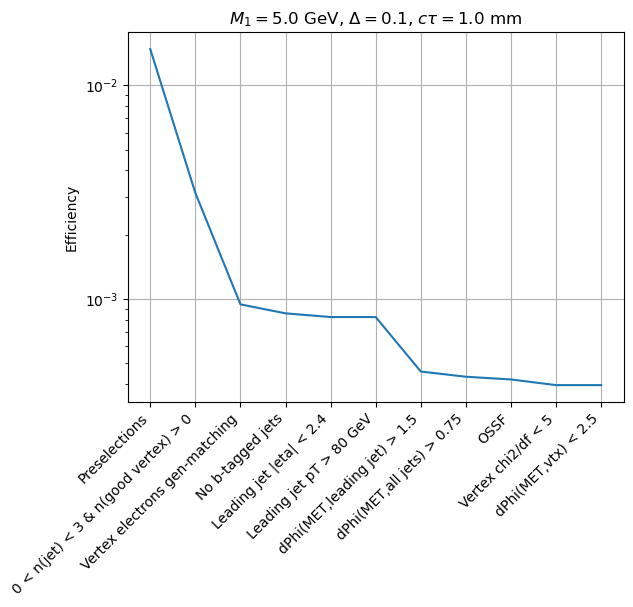

In [34]:
delta = deltas[0]
m1 = m1s[0]
ct = ctaus[0]

plot_efficiency_signal( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                        m1 = m1, delta = delta, ct = ct, 
                        doSave = False, outDir = './plots/cutflow/', outName = f'efficiency_m1_{m1}_delta_{delta}_ct_{ct}.png')

#### Plot the efficiency and counts with varying m1's overlaid

In [35]:
def plot_efficiency_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel('Efficiency')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

In [36]:
def plot_counts_signal_varying_M1(df_sig, dict_eff, cuts, cutNames, delta, ct, doLog=True, doSave=False, outDir = 'plots/cutflow/', outName='efficiency.png'):
    m1s = sorted(list(set(df_sig[(df_sig.delta==delta)&(df_sig.ctau==ct)].m1)))
        
    for m1 in m1s:
        pt = df_sig[(df_sig.delta==delta) & (df_sig.m1==m1) & (df_sig.ctau==ct)].name[0]
        effs = [dict_eff[pt][cut] for cut in cuts]
        plt.plot(np.arange(len(cuts)), effs, label=r"$M_1 = {0}$ GeV".format(m1), color=f"C{m1s.index(m1)}")

    if doLog:
        plt.yscale('log')

    plt.ylabel('Events')
    
    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

    plt.grid()

    plt.title(r"$\Delta = {0:.1f}$, $c\tau = {1}$ mm".format(delta,ct))

    plt.legend()
    
    if doSave:
        if not os.path.isdir(outDir):
            os.makedirs(outDir)
        plt.savefig(f'{outDir}/{outName}')
        print(f'Saved: {outDir}/{outName}')

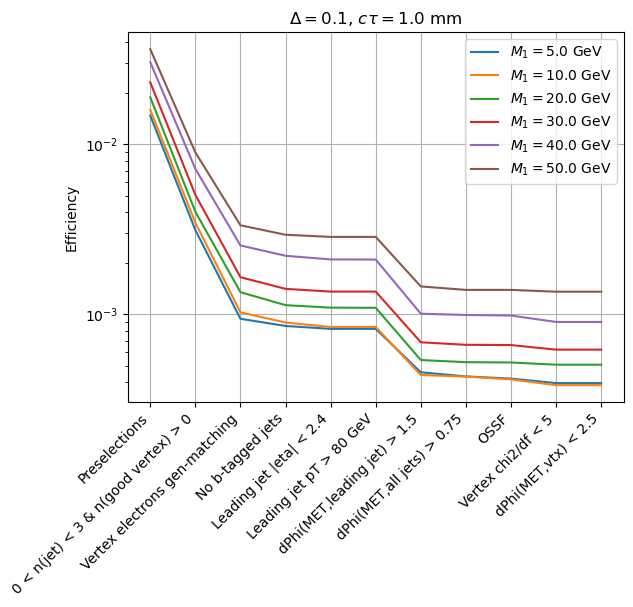

In [37]:
delta = deltas[0]
ct = ctaus[0]

plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                   delta = delta, ct = ct,
                                   doSave = False, outDir = 'plots/cutflow/', outName = f'efficiency_delta_{delta}_ct_{ct}.png')

#### Plot with various ctaus on one axis

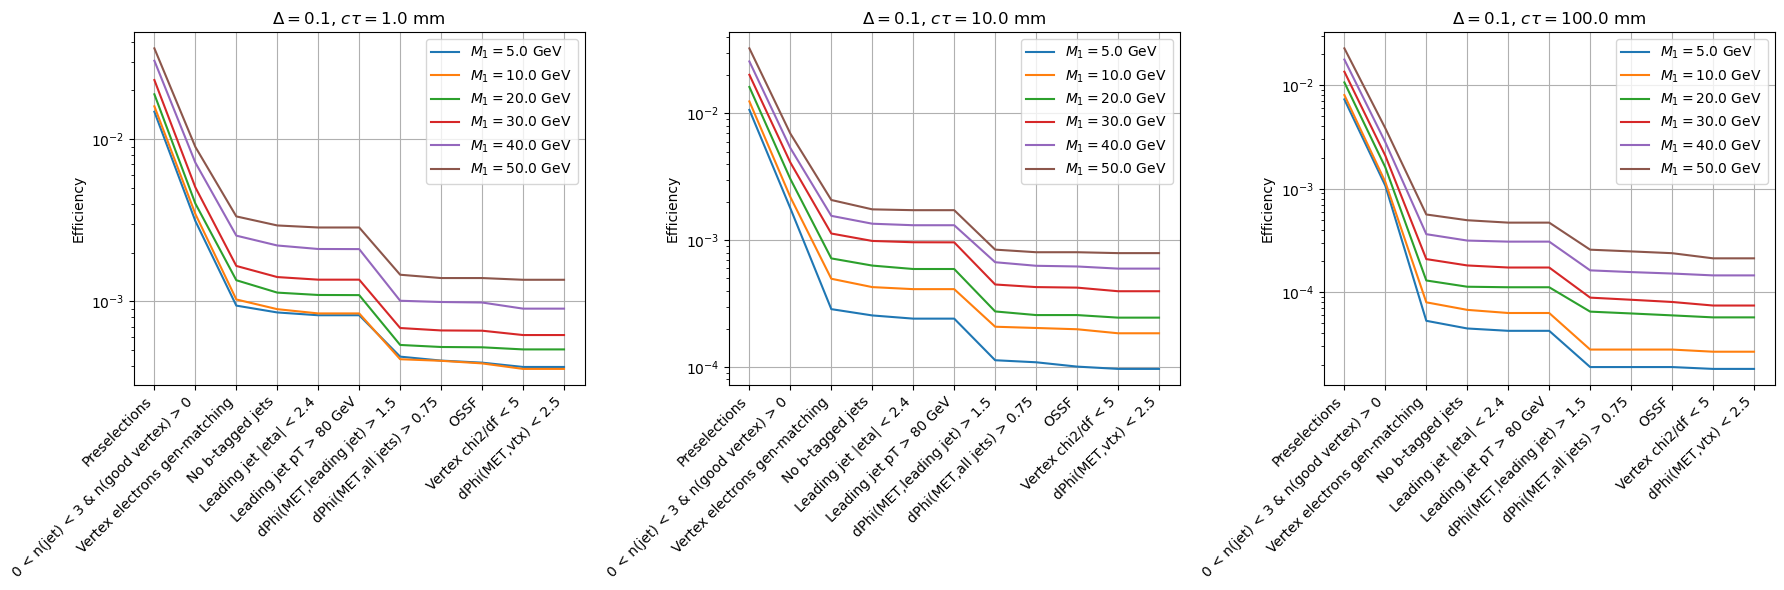

In [38]:
delta = deltas[0]
ctaus = sorted(list(set(si[si.delta==delta].ctau)))

fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))

for i, ct in enumerate(ctaus):
    plt.sca(axes[i])
    plot_efficiency_signal_varying_M1( df_sig = si, dict_eff = cf_s, cuts = cuts, cutNames = cutNames, 
                                       delta = delta, ct = ct )
plt.tight_layout()
plt.show()

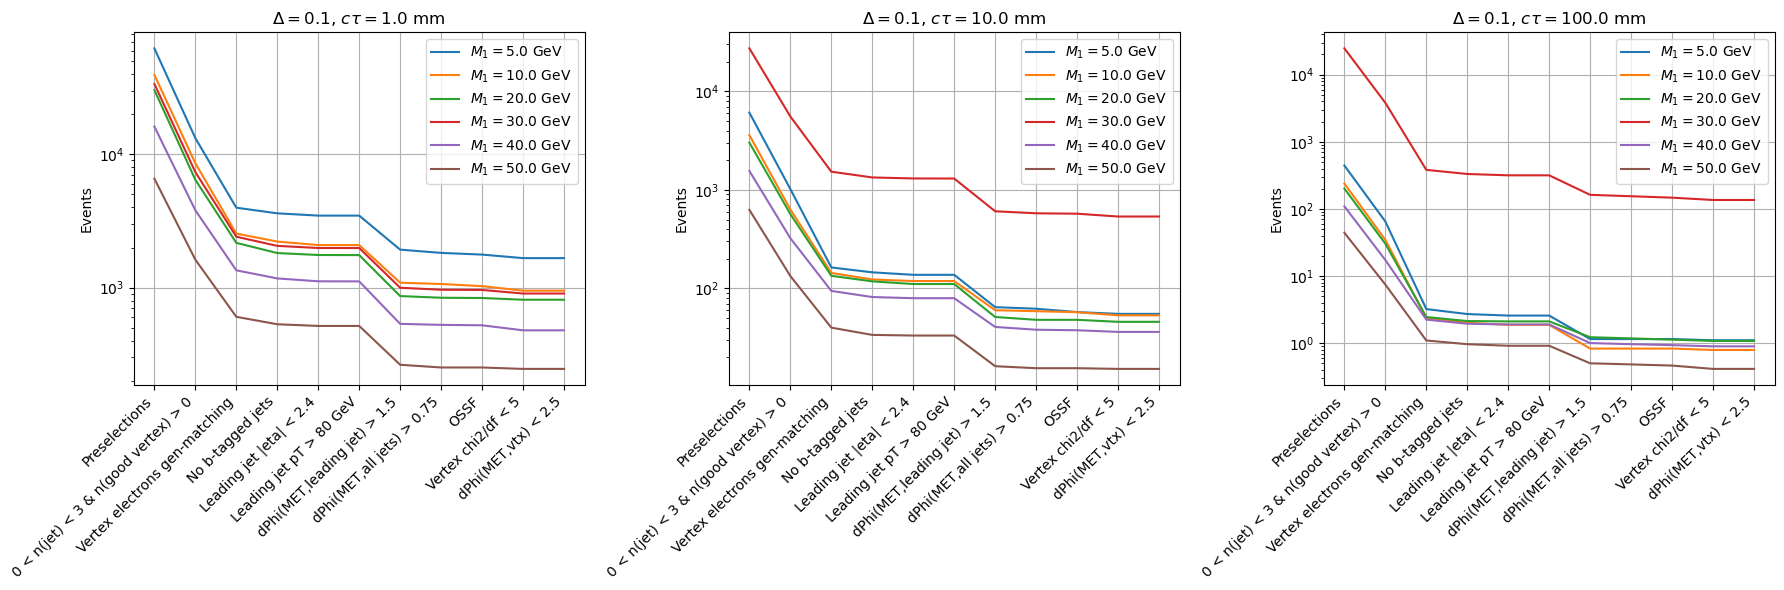

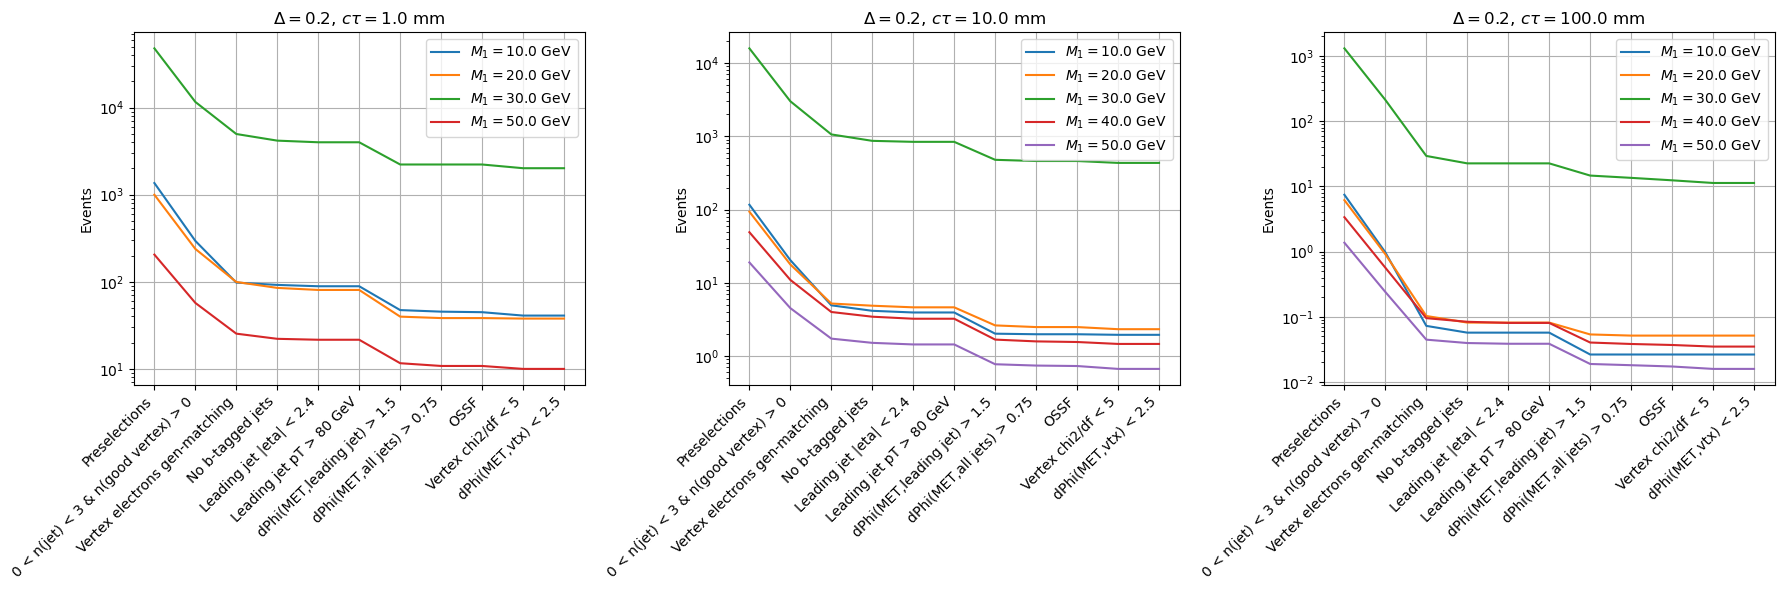

In [39]:
for delta in deltas:
    ctaus = sorted(list(set(si[si.delta==delta].ctau)))
    
    fig,axes = plt.subplots(1,len(ctaus),figsize=(6*len(ctaus),6))
    
    for i, ct in enumerate(ctaus):
        plt.sca(axes[i])
        plot_counts_signal_varying_M1( df_sig = si, dict_eff = ct_s, cuts = cuts, cutNames = cutNames, 
                                           delta = delta, ct = ct )
    plt.tight_layout()
    plt.show()

## Background

For background processes, each process (i.e. Top) will have several sub-processes. In the coffea output file, we have efficiencies stored for each sub-processes. In order to get the efficiency of the process, not each sub-process, we have to do some math. In other words, we can't just add up efficiencies.

### Get cutflow information

In [40]:
cuts = list(bkg_histos['W+jets']['cutflow']['bkg_2018_WJetsLNu_HT2500toInf'])
print(cuts)

['all', 'hasVtx', 'cut5', 'cut6', 'cut7', 'cut8', 'cut9', 'cut10', 'cut11', 'cut12']


In [41]:
tot_bkg_cts = {} 
tot_bkg_effs = {} 
total_bkg_counts = {} 

In [42]:
for b in bkg_histos.keys():
    print('\n')
    print(b)
    
    total_bkg_counts[b] = 0
    for k in bkg_histos[b]['cutflow'].keys():
        #print(bkg_histos[b]['cutflow_cts'][k]['all']) # xsec * lumi * (np.sum(events.genWgt)/sum_wgt)
        #print(bkg_histos[b]['cutflow'][k]['all'])     # (np.sum(events.genWgt)/sum_wgt)

        print(f"{k}: xsec * lumi = {bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']}")
        
        total_bkg_counts[b] += bkg_histos[b]['cutflow_cts'][k]['all'] / bkg_histos[b]['cutflow'][k]['all']

    print(f'\nxsec * lumi = {total_bkg_counts[b]} for all the sub-processes for {b}')



QCD
bkg_2018_QCD_HT700to1000: xsec * lumi = 380758120.0000001
bkg_2018_QCD_HT500to700: xsec * lumi = 1853533400.0
bkg_2018_QCD_HT1500to2000: xsec * lumi = 6485572.0
bkg_2018_QCD_HT1000to1500: xsec * lumi = 66830110.0
bkg_2018_QCD_HT300to500: xsec * lumi = 19241328000.0
bkg_2018_QCD_HT2000toInf: xsec * lumi = 1337798.7999999998

xsec * lumi = 21550273000.8 for all the sub-processes for QCD


Top
bkg_2018_ST_s-channel: xsec * lumi = 212336.66999999998
bkg_2018_ST_t-channel_antitop: xsec * lumi = 4292802.499999999
bkg_2018_ST_t-channel_top: xsec * lumi = 7161650.999999998
bkg_2018_ST_tW_top: xsec * lumi = 1941483.5
bkg_2018_ST_tw_antitop: xsec * lumi = 1945073.3
bkg_2018_TTJets: xsec * lumi = 28221811.000000004

xsec * lumi = 43775157.97 for all the sub-processes for Top


DY
bkg_2018_0001: xsec * lumi = 321825569.99999994
bkg_2018_0004: xsec * lumi = 321825570.0
bkg_2018_0000: xsec * lumi = 321825570.0
bkg_2018_0002: xsec * lumi = 321825569.9999999

xsec * lumi = 1287302280.0 for all t

In [43]:
for b in bkg_histos.keys():
    cfd = bkg_histos[b]['cutflow_cts']
    effd = bkg_histos[b]['cutflow']

    cts_dict = {k:0 for k in cuts}
    
    for k in cfd.keys():
        for c in cuts:
            #print(f'{k} at {c}: xsec * lumi * (np.sum(events.genWgt)/sum_wgt) = {cfd[k][c]}')
            
            cts_dict[c] += cfd[k][c]

    c = 'all'
    print(f'\n{b}:  xsec * lumi * eff at {cutNames[c]} = {cts_dict[c]}')
    
    tot_bkg_cts[b] = cts_dict # subprocess summed
    tot_bkg_effs[b] = {c:cts_dict[c]/total_bkg_counts[b] for c in cuts}

    #print(tot_bkg_cts[b][c])
    #print(total_bkg_counts[b]) # subprocess summed from previous cell


QCD:  xsec * lumi * eff at No cuts = 38039.826987393106

Top:  xsec * lumi * eff at No cuts = 5667.491119528111

DY:  xsec * lumi * eff at No cuts = 14495.724273410278

Diboson:  xsec * lumi * eff at No cuts = 4424.202427727811

Triboson:  xsec * lumi * eff at No cuts = 52.9969216443768

W+jets:  xsec * lumi * eff at No cuts = 227212.60103568572

Z+jets:  xsec * lumi * eff at No cuts = 142220.15349869026


In [44]:
b = 'Triboson'
c = 'all'

print('Efficiency (all sub-processes considered) = ( xsec * lumi * sum( eff of each sub-process ) ) / ( xsec * lumi )')
print(f'{b} at cut {cutNames[c]}: {tot_bkg_effs[b][c]}')

Efficiency (all sub-processes considered) = ( xsec * lumi * sum( eff of each sub-process ) ) / ( xsec * lumi )
Triboson at cut No cuts: 0.0019325663156032672


In [45]:
bkg_summed_cts = {c:sum([tot_bkg_cts[b][c] for b in tot_bkg_cts.keys()]) for c in cuts}

c = 'cut10'
print(f'Total backgrounds (xsec * lumi * eff) at cut {cutNames[c]}: {bkg_summed_cts[c]}')

Total backgrounds (xsec * lumi * eff) at cut OSSF: 6019.940329275996


In [46]:
bkg_summed_eff = {c: bkg_summed_cts[c] / sum(total_bkg_counts.values()) for c in cuts}

print(bkg_summed_eff)

{'all': 1.878092097231049e-05, 'hasVtx': 2.3803651294383054e-06, 'cut5': 1.90624245974092e-06, 'cut6': 1.8166633461303788e-06, 'cut7': 1.8135666037132032e-06, 'cut8': 8.793299302239878e-07, 'cut9': 4.942504113746768e-07, 'cut10': 2.6164458037513464e-07, 'cut11': 6.693097435332778e-08, 'cut12': 6.282623106503956e-08}


### Display the efficiency and event count table in Pandas Dataframe

In [47]:
columns = list(bkg_histos.keys())
columns

['QCD', 'Top', 'DY', 'Diboson', 'Triboson', 'W+jets', 'Z+jets']

In [48]:
tot_bkg_effs['Triboson']

{'all': 0.0019325663156032672,
 'hasVtx': 0.00026779659468989693,
 'cut5': 0.000179346936340641,
 'cut6': 0.0001664984611169233,
 'cut7': 0.00016588574911029544,
 'cut8': 8.160181182379527e-05,
 'cut9': 2.545816658400046e-05,
 'cut10': 1.8233260101116423e-05,
 'cut11': 2.2698841620288038e-06,
 'cut12': 2.2698841620288038e-06}

In [49]:
efficiency = {c: [ tot_bkg_effs[samp][c] for samp in columns ] for c in cuts}

efficiency['all']

[1.7651668257743638e-06,
 0.00012946820485290213,
 1.126054423939207e-05,
 0.0006373026064192725,
 0.0019325663156032672,
 0.0023099635965568507,
 0.0066453386621012816]

In [50]:
eff_df = pd.DataFrame.from_dict(efficiency).transpose()
eff_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

eff_df.index = cut

In [51]:
pd.options.display.float_format = '{:.9f}'.format
eff_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets
Preselections,0.000001765,0.000129468,0.000011261,0.000637303,0.001932566,0.002309964,0.006645339
0 < n(jet) < 3 & n(good vertex) > 0,0.000000137,0.000022551,0.000002143,0.000083145,0.000267797,0.000321131,0.000743060
No b-tagged jets,0.000000091,0.000014268,0.000001956,0.000061512,0.000179347,0.000257209,0.000608118
Leading jet |eta| < 2.4,0.000000090,0.000012667,0.000001956,0.000057643,0.000166498,0.000244045,0.000578392
Leading jet pT > 80 GeV,0.000000090,0.000012631,0.000001956,0.000057053,0.000165886,0.000243597,0.000577388
"dPhi(MET,leading jet) > 1.5",0.000000050,0.000006551,0.000000410,0.000028343,0.000081602,0.000121121,0.000290553
"dPhi(MET,all jets) > 0.75",0.000000014,0.000003253,0.000000373,0.000012256,0.000025458,0.000066457,0.000178249
OSSF,0.000000014,0.000001772,0.000000298,0.000006020,0.000018233,0.000033350,0.000089904
Vertex chi2/df < 5,0.000000000,0.000000569,0.000000111,0.000001662,0.000002270,0.000008885,0.000022711
"dPhi(MET,vtx) < 2.5",0.000000000,0.000000558,0.000000111,0.000001435,0.000002270,0.000008411,0.000020569


In [52]:
counts = {c: [ tot_bkg_cts[samp][c] for samp in columns ] for c in cuts}

counts['all']

[38039.826987393106,
 5667.491119528111,
 14495.724273410278,
 4424.202427727811,
 52.9969216443768,
 227212.60103568572,
 142220.15349869026]

In [53]:
cts_df = pd.DataFrame.from_dict(counts).transpose()
cts_df.columns = columns

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))

cts_df.index = cut

In [54]:
pd.options.display.float_format = '{:,.2f}'.format
cts_df

,QCD,Top,DY,Diboson,Triboson,W+jets,Z+jets
Preselections,"38,039.83","5,667.49","14,495.72","4,424.20",53.00,"227,212.60","142,220.15"
0 < n(jet) < 3 & n(good vertex) > 0,"2,948.06",987.17,"2,758.17",577.20,7.34,"31,587.11","15,902.59"
No b-tagged jets,"1,970.00",624.57,"2,518.29",427.02,4.92,"25,299.55","13,014.63"
Leading jet |eta| < 2.4,"1,937.15",554.51,"2,518.29",400.16,4.57,"24,004.79","12,378.46"
Leading jet pT > 80 GeV,"1,937.15",552.94,"2,518.29",396.07,4.55,"23,960.73","12,356.96"
"dPhi(MET,leading jet) > 1.5","1,086.02",286.76,527.93,196.76,2.24,"11,913.73","6,218.26"
"dPhi(MET,all jets) > 0.75",312.20,142.38,479.75,85.08,0.70,"6,536.86","3,814.79"
OSSF,312.20,77.59,383.38,41.79,0.50,"3,280.39","1,924.08"
Vertex chi2/df < 5,0.00,24.89,143.51,11.54,0.06,873.91,486.04
"dPhi(MET,vtx) < 2.5",0.00,24.44,143.51,9.96,0.06,827.33,440.21


### Plot the efficiency

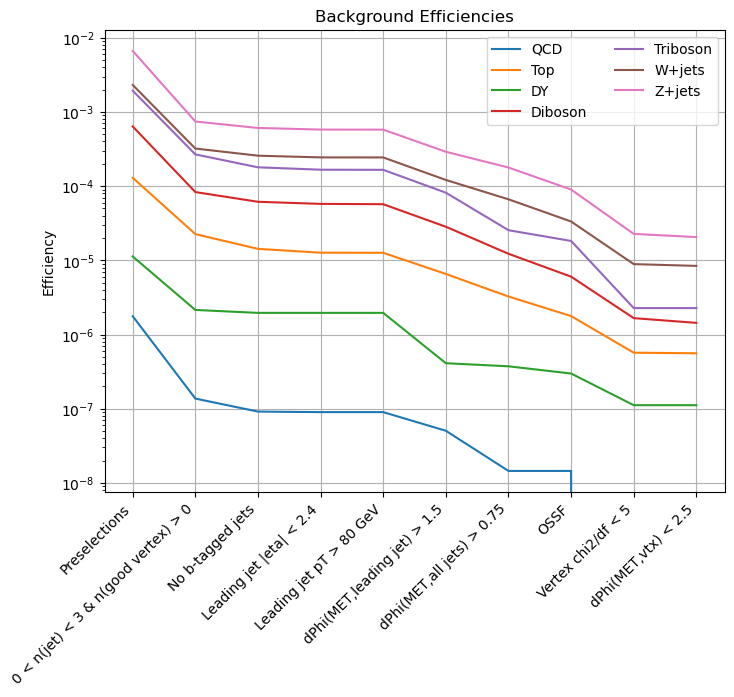

In [55]:
# bkg efficiencies summed over sub-samples

plt.figure(figsize=(8,6))
plt.title("Background Efficiencies")

for b in bkg_histos.keys():
    cfbs = tot_bkg_effs[b]
    effs = [cfbs[c] for c in cuts]
    plt.plot(np.arange(len(effs)),effs,label=b)
    #plt.ylim([1e-12,1])

plt.yscale('log')
plt.ylabel("Efficiency")
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

plt.show()

#os.makedirs("plots/cutflows/")
#plt.savefig(f"plots/cutflows/bkg_combined_efficiencies.png")

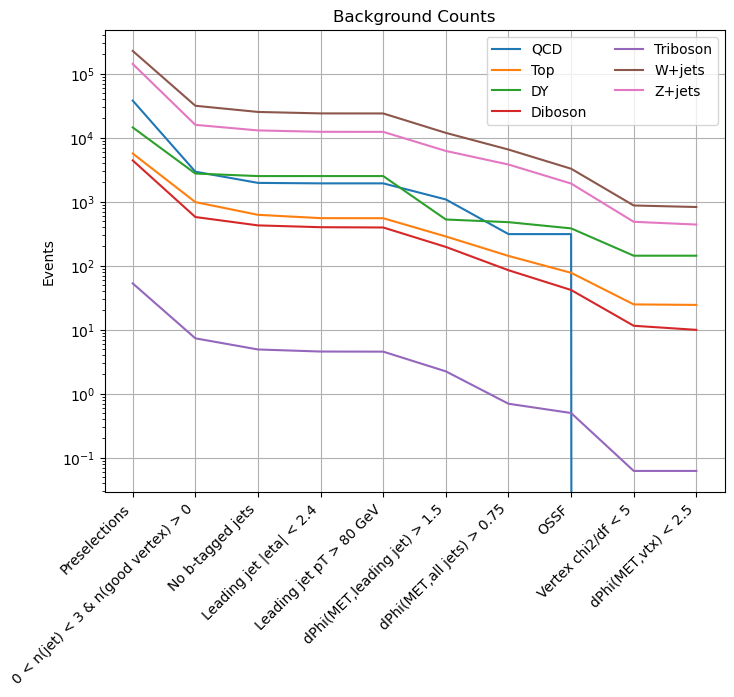

In [56]:
# bkg counts
plt.figure(figsize=(8,6))
plt.title("Background Counts")

for b in bkg_histos.keys():
    cf = tot_bkg_cts[b]
    effs = [cf[c] for c in cuts]
    plt.plot(np.arange(len(effs)), effs, label=b)
    
plt.yscale('log')
plt.ylabel('Events')
plt.legend(loc='upper right',ncol=2)
plt.grid()

labels = [cutNames[c] for c in cuts]
# Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')

plt.show()

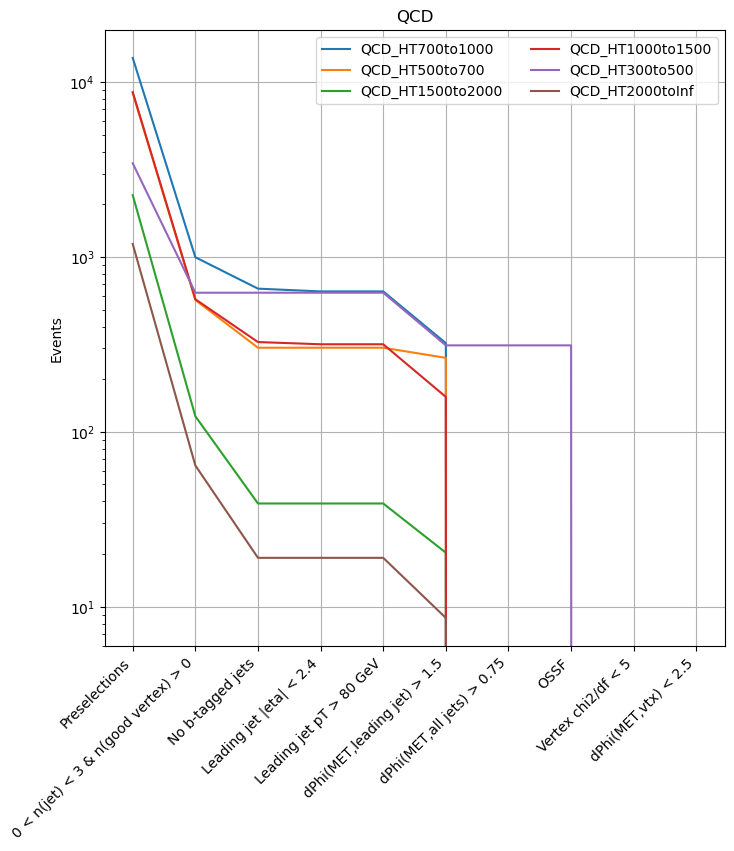

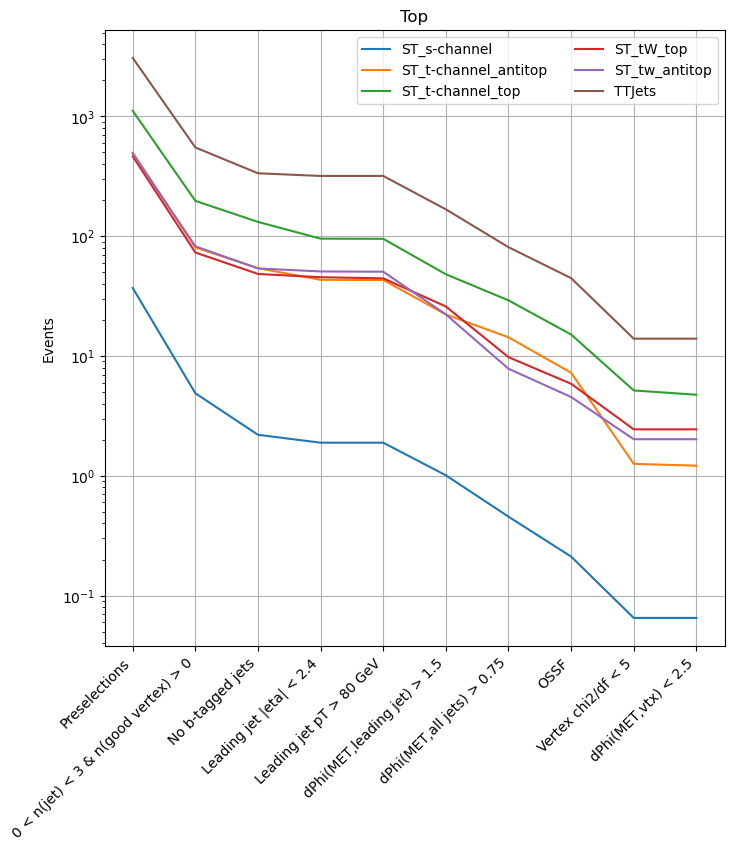

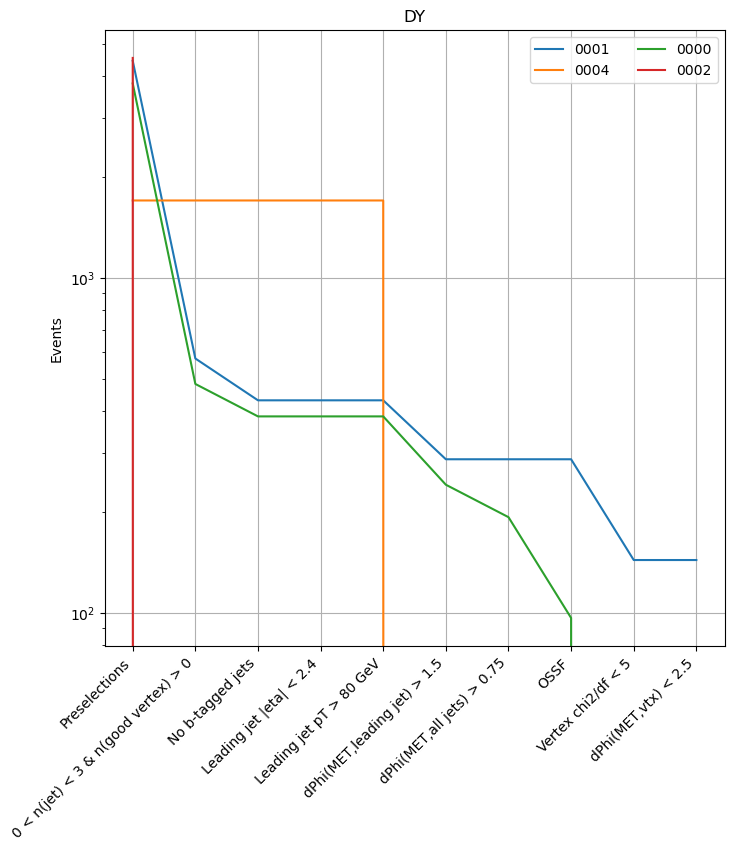

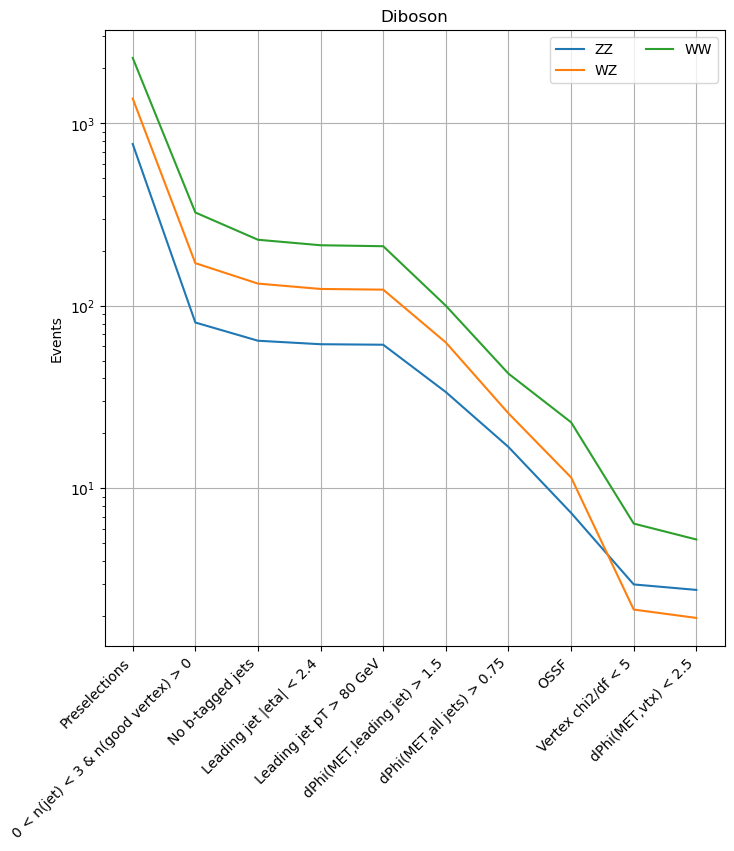

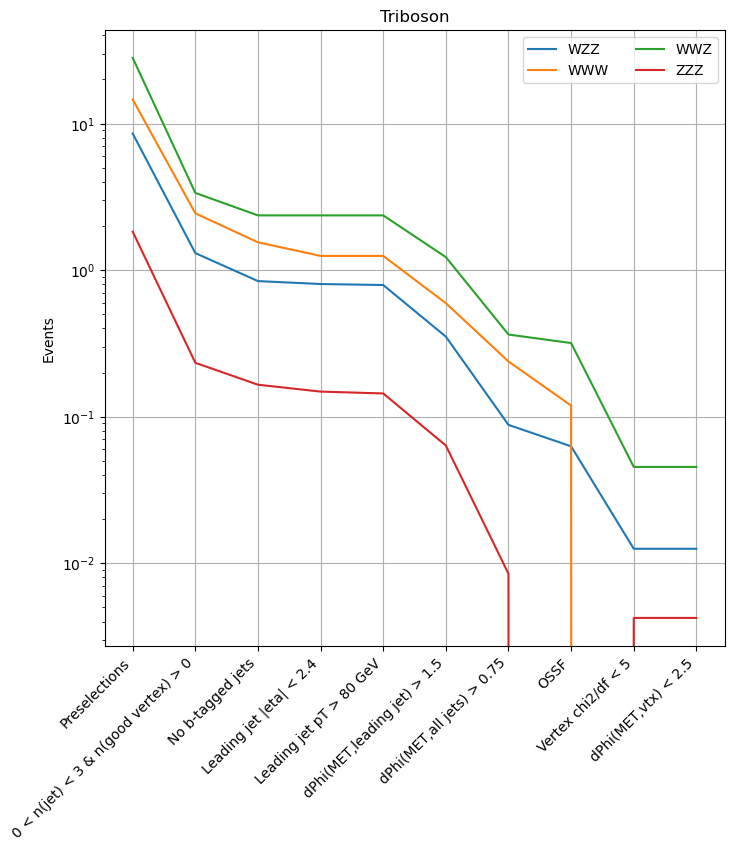

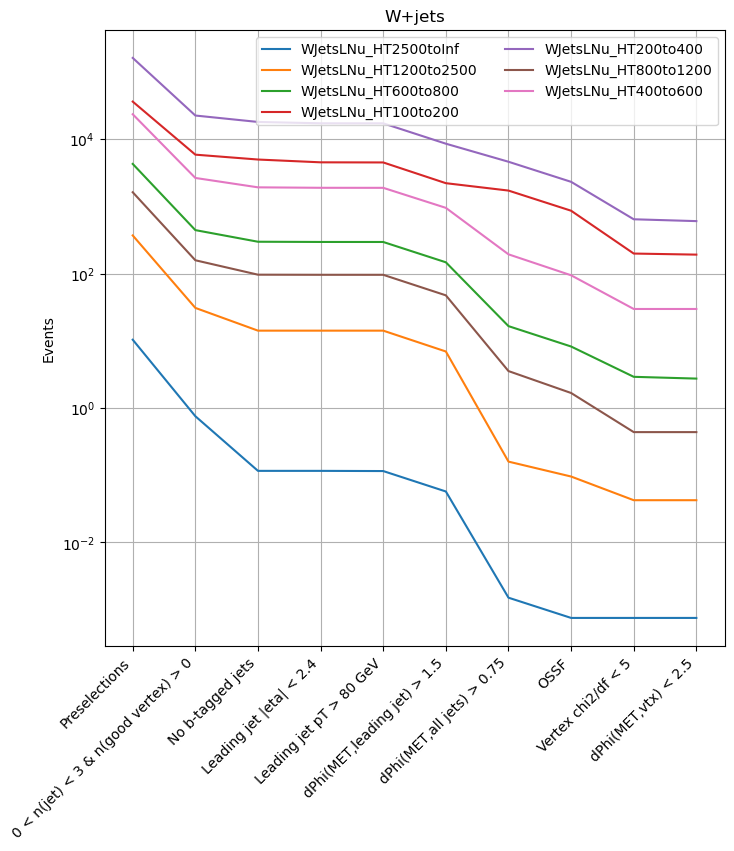

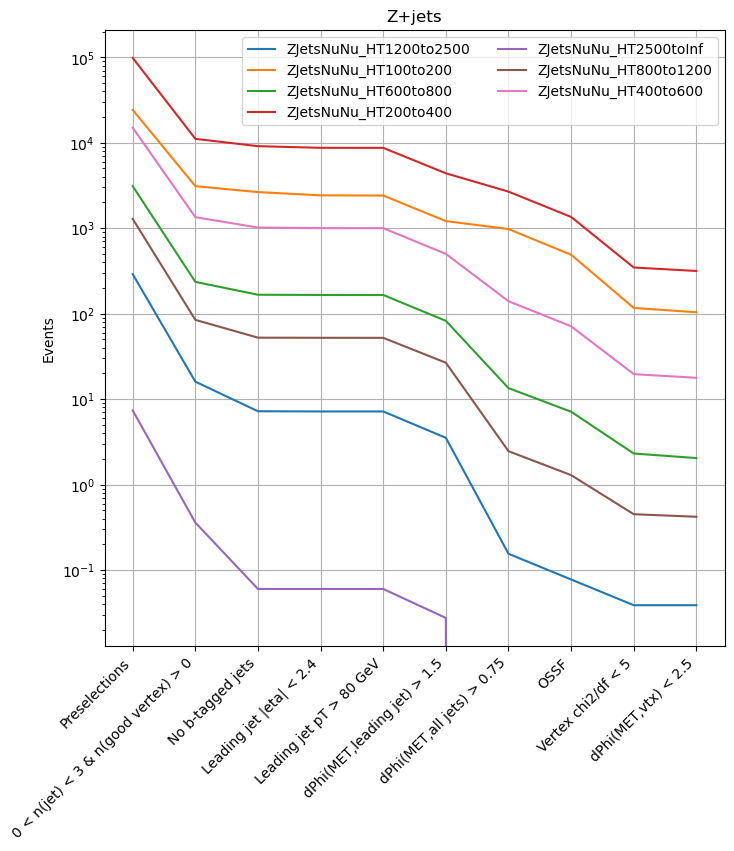

In [57]:
# bkg counts
for b in bkg_histos.keys():
    cfbs = bkg_histos[b]['cutflow_cts']
    #print(cfbs.keys())
    plt.figure(figsize=(8,8))
    plt.title(b)
    subsamples = list(cfbs.keys())
    for bkg_pt in subsamples:
        cf = cfbs[bkg_pt]
        #print(cf)
        effs = [cf[c] for c in cuts]
        plt.plot(np.arange(len(effs)),effs,label=bkg_pt[9:])
    #plt.ylim([1e-12,1])
    plt.yscale('log')
    plt.ylabel('Events')
    plt.legend(loc='upper right',ncol=2)
    plt.grid()
    #plt.xlabel("Cut Number")

    labels = [cutNames[c] for c in cuts]
    # Replace "No cuts" with "Preselections" and "Baseline Selection" with "0 < n(jet) < 3 & n(good vertex) > 0"
    cut = list(map(lambda x: x.replace('Baseline Selection', '0 < n(jet) < 3 & n(good vertex) > 0'), labels))
    cut = list(map(lambda x: x.replace('No cuts', 'Preselections'), cut))
    
    plt.xticks(ticks = np.arange(len(cuts)), labels = cut, rotation = 45, ha = 'right')
    
    #plt.savefig(f"plots/cutflows/bkg_{b}_counts_pdf")
    #plt.close()